# **Proyek Analisis Data: Bike Sharing Dataset**
- **Nama:** Wayan Ardike
- **Email:**  ardiwayan470@gmail.*com*
- **ID Dicoding:** wayanardike

## Menentukan Pertanyaan Bisnis

- Bagaimana tingkat pertumbuhan jumlah penyewaan sepeda tiap bulan pada tahun 2011 dan 2012 ?
- Jenis musim apa yang memiliki jumlah penyewaan sepeda terbaik ?
- Saat cuaca seperti apa jumlah penyewaan sepeda meningkat ?
- Bagaimana tingkat penyewaan sepeda saat hari kerja?
- Bagaimana hubungan/ korelasi antara kondisi suhu lingkungan dengan jumlah penyewa sepeda ?

## Import Semua Packages/Library yang Digunakan

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [79]:
df = pd.read_csv('/content/day.csv')
df = pd.DataFrame(df)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Memastikan value pada data

In [80]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Terdapat beberapa features yang memiliki nilai atau value bertipe numerik yang padahal aslinya bertipe kategorik seperti kolom mtnh, weekday, yr, season, maka akan dilakukan transformasi pada proses cleanning untuk mempermudah dalam melakukan proses analisis dan visualisasi nantinya.

####Memeriksa tipe data

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Terdapat beberapa features yang memiliki tipe data berbeda dengan valuenya yaitu dteday seharusnya bertipe data datetime kemudian untuk season, mnth, weekday, weathersit memiliki tipe data category
- Jika dilihat semua jumlah datanya sama yaitu 731 bari, artinya tidak memiliki data kosong.

####Memeriksa data kosong

In [82]:
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Untuk memastikan tidak terdapat data kosong, hasilnya sama semua tidak ada data kosong.

####Memeriksa data duplikat

In [83]:
df.duplicated().sum()

0

**Insight:**
- tidak terdapat data yang sama atau duplikat

####Memeriksa inaccurate value

In [84]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Insight:
- Semua nampak normal tidak ada keanehan pada data yang ditampilkan, mulai dari nilai min, mean hingga max semuanya normal.

### Cleaning Data

#### Mengubah value pada features

In [85]:
df['mnth'] = df['mnth'].replace({
    1: 'Januari', 2: 'Febuari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
    7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
    })

df['season'] = df['season'].replace({
     1: 'Semi', 2: 'Panas', 3: 'Gugur', 4: 'Dingin'
     })

df['weekday'] = df['weekday'].replace({
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
    })

df['weathersit'] = df['weathersit'].replace({
    1: 'Cerah/Berawan Sebagian', 2: 'Berkabut/Berawan', 3: 'Salju/Hujan Ringan', 4: 'Cuaca Ekstrem'
    })

df['yr'] = df['yr'].replace({
    0: '2011', 1: '2012'
    })

df['workingday'] = df['workingday'].replace({
    0: 'Libur', 1: 'Bekerja'
    })


df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Semi,2011,Januari,0,Sabtu,Libur,Berkabut/Berawan,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Semi,2011,Januari,0,Minggu,Libur,Berkabut/Berawan,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Semi,2011,Januari,0,Senin,Bekerja,Cerah/Berawan Sebagian,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Semi,2011,Januari,0,Selasa,Bekerja,Cerah/Berawan Sebagian,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Semi,2011,Januari,0,Rabu,Bekerja,Cerah/Berawan Sebagian,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Beberapa kolom yang tadinya memiliki value atau nilai bertipe numerik kemudian diganti dengan tipe kategorik, penggantian nilai disesuaikan berdasarkan konteks masing-masing pada features misalnya kolom weekdays diganti dengan nilai berdasarkan nama hari dalam 1 minggu.

####Mengubah tipe data

In [86]:
df['mnth'] = pd.Categorical(
    df['mnth'],
    categories=[
        'Januari','Febuari','Maret','April','Mei',
        'Juni','Juli','Agustus','September','Oktober','November','Desember'],
    ordered=True
)

df['weekday'] = pd.Categorical(
    df['weekday'],
    categories=['Minggu','Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'],
    ordered=True
)

df['yr'] = pd.Categorical(
    df['yr'],
    categories=['2011', '2012'],
    ordered=True
)

df = df.astype({
    'season':'category',
    'weathersit':'category',
    'workingday':'category'
})

df['dteday'] = pd.to_datetime(df['dteday'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

**Insights:**
- Selain value atau nilai yang dirubah tipe data pada features juga dirubah guna menyesuikan dengan konteks nilainya, disini ada 2 tipe data yang disesuaikan yaitu tipe kategorik (kategorik terurut dan tidak terurut) dan datetime

## Exploratory Data Analysis (EDA)

### Melihat rangkuman parameter statistik

In [87]:
df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731.000000,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,NaN,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Gugur,2012,Januari,NaN,Minggu,Bekerja,Cerah/Berawan Sebagian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,NaN,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Penyewaan sepeda paling banyak dilakukan pada bulan januari.
- Hari minggu menjadi paling favorit untuk menyewa sepeda.
- Aktivitas penyewaan sepeda sebagian besar dilakukan saat pergi bekerja.
- Cuaca cerah menjadi paling disukai dalam penyewaan sepeda.
- Musim gugur menjadi periode dengan paling banyak aktivitas penyewaan sepeda.
- Rata-rata aktivitas penyewaan setiap hari adalah 4504.

### Explorasi trend penyewaan sepeda dari tahun 2011 hingga 2012

In [88]:
df.groupby(by='yr').agg({
    'cnt':'sum',
    'casual':['sum', 'mean'],
    'registered':['sum', 'mean']
})

<ipython-input-88-9f744fc19fb5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by='yr').agg({


cnt  casual              registered             
          sum     sum         mean        sum         mean
yr                                                        
2011  1243103  247252   677.402740     995851  2728.358904
2012  2049576  372765  1018.483607    1676811  4581.450820

**Insight:**
Secara keseluruhan tingkat penyewaan sepeda dari tahun 2011 hingga tahun 2012 mengalami peningkatan hampir 2 kali lipatnya, demikian juga peningkatan antara pengguna yang sudah terdaftar dengan belum terdaftar yang mengalami peningkatan hampir 2 kali lipat.

### Explorasi distribusi penyewaan berdasarkan musim

In [89]:
df.groupby(by="season").agg({'cnt':['sum', 'min', 'max']})

<ipython-input-89-4b8bde436086>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by="season").agg({'cnt':['sum', 'min', 'max']})


cnt            
            sum   min   max
season                     
Dingin   841613    22  8555
Gugur   1061129  1115  8714
Panas    918589   795  8362
Semi     471348   431  7836

**Insight:** Dapat diketahui bahwa distribusi penyewaan berdasarkan cuaca cukup beragam, dimana aktivitas penyewaan sepeda paling banyak dilakukan pada musim gugur mencapai 1 juta aktivitas berkisar 1k-8k aktivitas setiap harinya, sedangkan aktivitas penyewaan paling sedikit terjadi pada musim semi berkisar 431 - 7k aktivitas per-harinya.

### Mengeksplorasi distribusi penyewaan berdasarkan cuaca

In [90]:
df.groupby(by='weathersit').agg({
    'cnt':['sum','max', 'min', 'mean', 'std']
})

<ipython-input-90-14ebb460a1c0>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by='weathersit').agg({


cnt                                     
                            sum   max  min         mean          std
weathersit                                                          
Berkabut/Berawan         996858  8362  605  4035.862348  1809.109918
Cerah/Berawan Sebagian  2257952  8714  431  4876.786177  1879.483989
Salju/Hujan Ringan        37869  4639   22  1803.285714  1240.284449

**Insight:** Aktivitas penyewaan sepeda paling banyak dilakukan saat cuaca cerah/ berawan sebagian mencapai 2 juta aktivitas penyewaan, kemudian cuaca bersalju/ hujan ringan dengan aktivitas penyewaan sedikit yang hanya 37k aktivitas, dapat diambil kesimpulan bahwa sebagian besar pengguna menyewa saat kondisi cuaca yang nyaman dan tenang.

### Mengkesplorasi trend penyewaan saat hari kerja

In [91]:
df.groupby(by='workingday').agg({
    'cnt':['sum', 'max', 'min'],
    'casual':['sum', 'max', 'min'],
    'registered':['sum', 'max', 'min']
})

<ipython-input-91-4cf53d673bde>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by='workingday').agg({


cnt             casual           registered           
                sum   max  min     sum   max min        sum   max  min
workingday                                                            
Bekerja     2292410  8362   22  303285  2469   2    1989125  6946   20
Libur       1000269  8714  605  316732  3410  54     683537  5966  451

**Insight:** Secara total aktivitas penyewaan sepeda saat hari kerja mencapai 2 juta aktivitas 2 kali lebih banyak saat hari libur, jika diperhatikan antara pengguna casual dan registered memiliki perbedaan yang cukup nyata dimana pengguna casual jumlah penyewaan saat bekerja dan libur tidak terlalu jauh, namun berbeda dengan pengguna terdaftar jumlah penyewaanya sangat jauh dimana jumlah aktivitas saat bekerja mencapai 1.9 juta 3 kali lebih banyak saat libur, dapat diambil kesimpulan sebagian besar pengguna yang terdaftar memilih menyewa sepeda untuk keperlua mereka bekerja.

### Mengeksplorasi hubungan/ korelasi antara beberapa features

In [92]:
df_numerik = df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]
df_numerik.corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


**Insight:** Dapat diketahui bahwa terdapat korelasi atau hubungan antara beberapa features, dimana features yang berhubungan dengan kondisi lingkungan (suhu hingga kelembapan) memiliki korelasi dengan features tingkat penyewaan sepeda ( casual, registered dan cnt).

Hubungan atau korelasi yang tercipta bersifat positif yang kuat dengan nilai korelasi 0.6 antara features yang berhubungan dengan kondisi lingkungan (suhu hingga kelembapan) dengan features tingkat penyewaan sepeda ( casual, registered dan cnt).

## Visualization & Explanatory Analysis

### Bagaimana tingkat pertumbuhan jumlah penyewaan sepeda tiap bulan pada tahun 2011 dan 2012 ?

<ipython-input-93-95f9bee76ff1>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  jumlahPerBulan = pd.pivot_table(


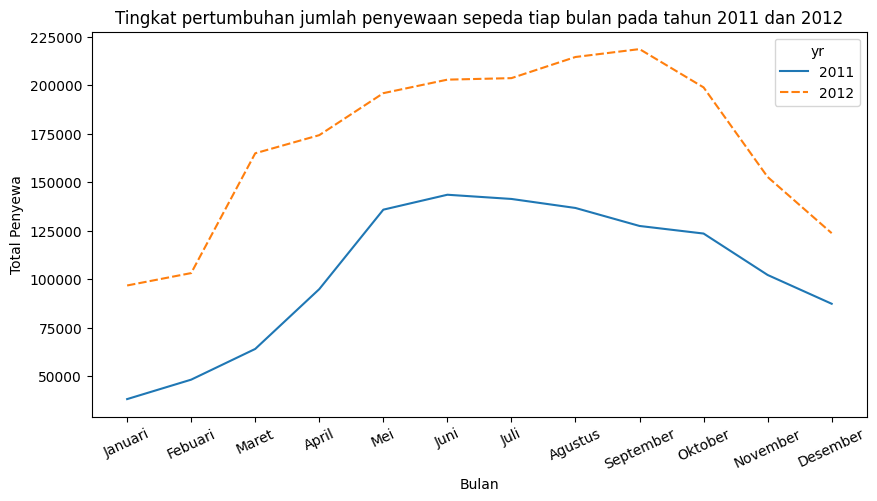

In [93]:
jumlahPerBulan = pd.pivot_table(
    df,
    index='mnth',
    columns='yr',
    values='cnt',
    aggfunc='sum'
)

plt.figure(figsize=(10, 5))
plt.title('Tingkat pertumbuhan jumlah penyewaan sepeda tiap bulan pada tahun 2011 dan 2012')
sns.lineplot(jumlahPerBulan)
plt.xlabel('Bulan')
plt.ylabel('Total Penyewa')
plt.xticks(rotation = 25)
plt.show()

**Insights:**
- Tingkat pertumbuhan penyewa sepeda dari tahun 2011 hingga tahun 2012 tersu mengalami kenaikan.
- Tingkat penyewaan sepeda pada tahun 2011 dan 2012 sama-sama mengalami peningkatan mulai dari januari-september dan menurun diakhir tahun yaitu pada bulan oktober-desember.

### Jenis musim apa yang memiliki jumlah penyewaan sepeda terbaik ?

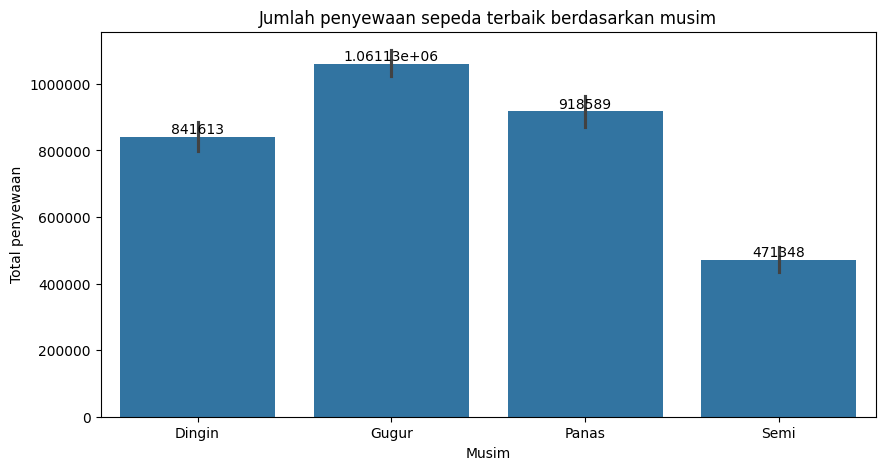

In [94]:
plt.figure(figsize=(10, 5))
plt.title('Jumlah penyewaan sepeda terbaik berdasarkan musim')
ax = sns.barplot(df, x='season', y='cnt', estimator='sum')
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Musim')
plt.ylabel('Total penyewaan')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

**Insight:**
- Jenis musim yang memiliki jumlah penyewa sepeda terbaik terjadi pada musim gugur yang diikuti musim dingin dan panas.

### Saat cuaca seperti apa jumlah penyewaan sepeda meningkat ?

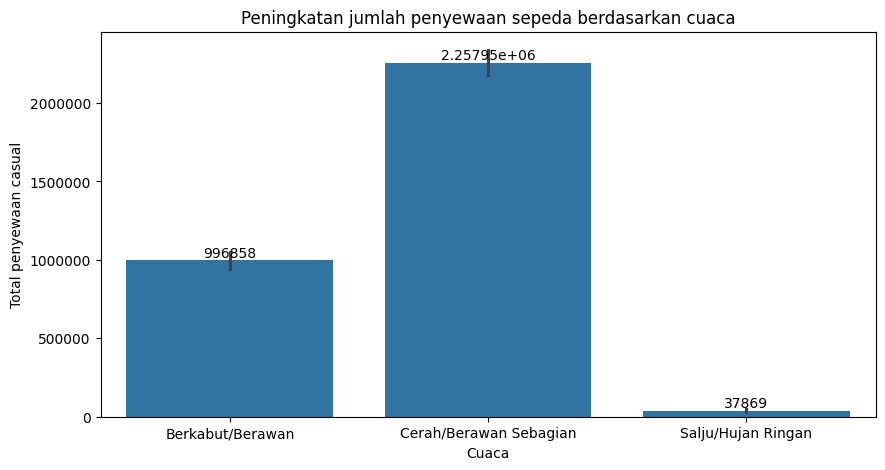

In [95]:
plt.figure(figsize=(10, 5))
plt.title('Peningkatan jumlah penyewaan sepeda berdasarkan cuaca')
ax = sns.barplot(df, x='weathersit', y='cnt', estimator='sum')
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Cuaca')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Total penyewaan casual')
plt.show()

**Insight:**
- Penyewaan sepeda meningkat saat cuaca cerah/ sebagian berawan yang menandakan banyak pengguna yang mencapai 2.2 juta penyewaan.

- Sebaliknya penyewaan sepeda menurun draktis saat cuaca sedang hujan atau bersalju yang hanya 37k aktivitas penyewaan ini artinya saat seperti ini kebanyakan pengguna tidak melakukan aktivitas diluar ruangan.

### Bagaimana tingkat penyewaan sepeda saat hari kerja?

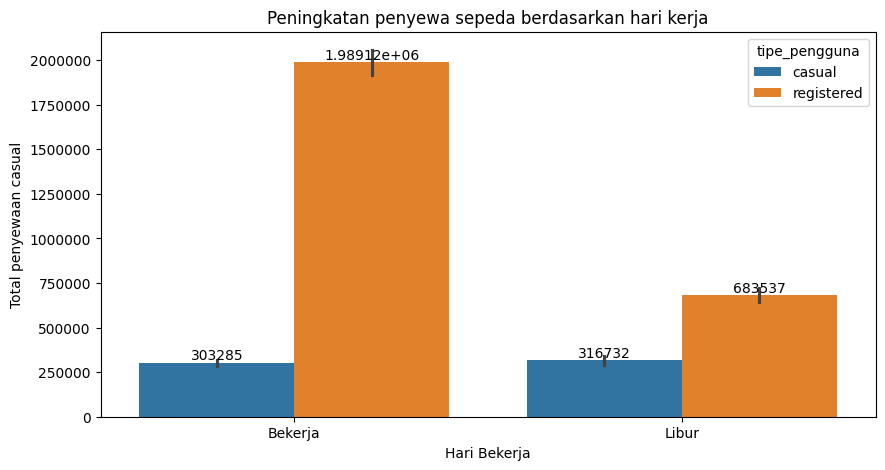

In [96]:
tipePengguna = df.melt(
    id_vars='workingday', value_vars=['casual', 'registered'],
    var_name='tipe_pengguna', value_name='total')

plt.figure(figsize=(10, 5))
plt.title('Peningkatan penyewa sepeda berdasarkan hari kerja')
ax = sns.barplot(tipePengguna, x='workingday', y='total', hue='tipe_pengguna', estimator='sum')
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.xlabel('Hari Bekerja')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Total penyewaan casual')
plt.show()

**Insight:**
- Tingkat penyewaan sepeda saat hari kerja lebih tinggi sedikit dibandingkan saat libur.
- Terdapat perbedaan antara penyewa yang sudah terdaftar dengan yang belum, dimana saat hari libur untuk pengguna yang belum terdaftar memiliki aktivitas penyewaan sepeda yang seimbang saat hari bekerja dan libur yakni masing-masing 30k dan 31k aktivitas, sedangkan pengguna yang sudah terdaftar memiliki jumlah aktivitas penyewaan sepeda lebih banyak saat bekerja yakni 1.9 juta dibandingkan saat libur hanya 600k artinya 3 kali lebih sedikit.

### Bagaimana hubungan/ korelasi antara kondisi suhu lingkungan dengan jumlah penyewa sepeda ?

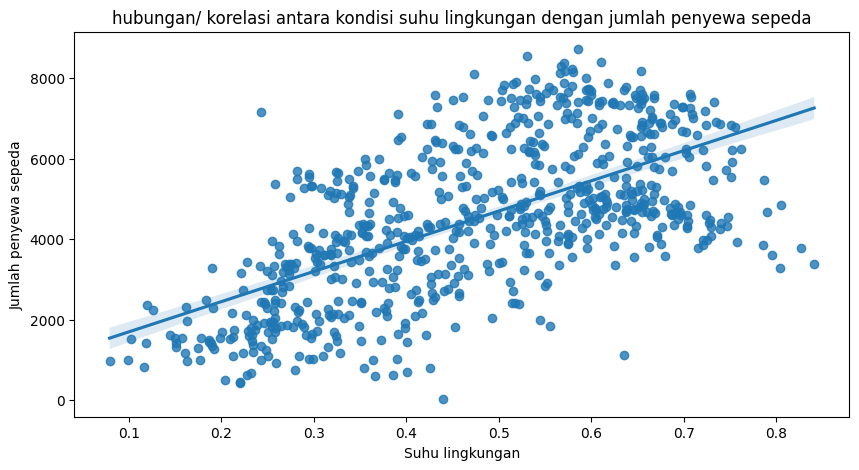

In [97]:
plt.figure(figsize=(10, 5))
plt.title('hubungan/ korelasi antara kondisi suhu lingkungan dengan jumlah penyewa sepeda')
sns.regplot(df, x='atemp', y='cnt')
plt.ylabel('Jumlah penyewa sepeda')
plt.xlabel('Suhu lingkungan')
plt.show()

**Insight:**
- Faktor suhu memiliki hubungan dengan jumlah penyewaan sepeda, dimana korelasi diantara keduanya membentu hubungan yang positif, artinya semakin suhu meningkat semakin banyak juga aktivitas penyewaan sepeda begitu juga sebaliknya.

## Analisis Lanjutan

### Kategori suhu yang dirasakan pengguna saat menyewa sepeda

In [98]:
df['temp category'] = pd.cut(
    df['atemp'],
    5,
    labels=['sangat dingin','dingin','normal','hangat', 'panas'])
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp category
0,1,2011-01-01,Semi,2011,Januari,0,Sabtu,Libur,Berkabut/Berawan,0.344167,0.363625,0.805833,0.160446,331,654,985,dingin
1,2,2011-01-02,Semi,2011,Januari,0,Minggu,Libur,Berkabut/Berawan,0.363478,0.353739,0.696087,0.248539,131,670,801,dingin
2,3,2011-01-03,Semi,2011,Januari,0,Senin,Bekerja,Cerah/Berawan Sebagian,0.196364,0.189405,0.437273,0.248309,120,1229,1349,sangat dingin
3,4,2011-01-04,Semi,2011,Januari,0,Selasa,Bekerja,Cerah/Berawan Sebagian,0.200000,0.212122,0.590435,0.160296,108,1454,1562,sangat dingin
4,5,2011-01-05,Semi,2011,Januari,0,Rabu,Bekerja,Cerah/Berawan Sebagian,0.226957,0.229270,0.436957,0.186900,82,1518,1600,sangat dingin


Menggunakan metode binning untuk membagi data menjadi 5 interval/ kategori berdasarkan besaran suhu yang dirasakan pengguna yaitu : sangat dingin, dingin, normal, hangat & panas.

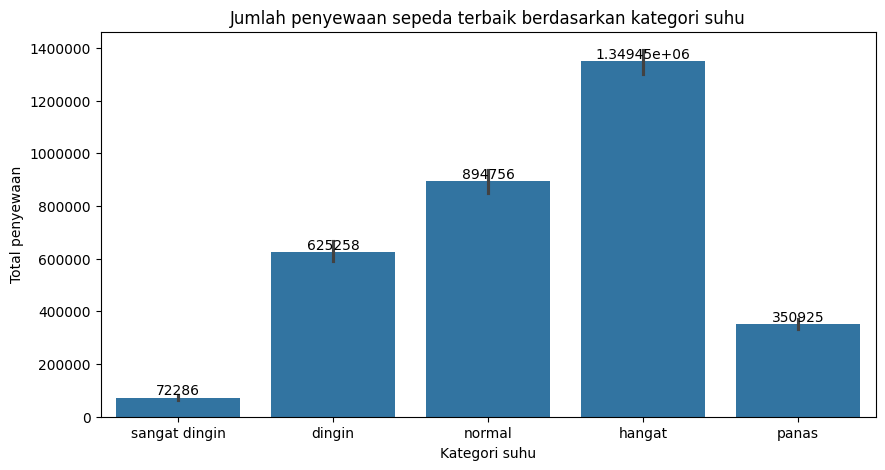

In [99]:
plt.figure(figsize=(10, 5))
plt.title('Jumlah penyewaan sepeda terbaik berdasarkan kategori suhu')
ax = sns.barplot(df, x='temp category', y='cnt', estimator='sum')
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Kategori suhu')
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel('Total penyewaan')
plt.show()

**Insight:**
- Dapat diketahui bahwa semakin meningkat suhunya maka semakin menurun aktivitas penyewaan sepeda seperti yang terjadi saat suhu sangat dingin (72k), dingin (600k) dan panas (350k).

- Sedangkan untuk suhu normal hingga hangat aktivitas penyewaan sepeda meningkat masing-masing berjumlah 894k dan 1.3 juta aktivitas penyewaan.

## Conclusion

- Terjadi peningkatan hampir 2 kali lipat jumlah penyewaan sepeda dari tahun 2011 (1.2 jt aktivitas) hingga 2012 (2 jt aktivitas), selain itu terdapat trend penyewaan sepeda yang dibuktikan aktivitas penyewaan sepeda akan mengalami kenaikan pada awal tahun yaitu bulan januari-september dan menurun saat akhir tahun yaitu oktober-desember yang disebapkan karena penurunan suhu akibat memasuki musim dingin.

- Penyewaan sepeda tertinggi terjadi pada musim gugur (1 juta aktivitas/ 1k-8k per hari), sedangkan terendah pada musim semi (431-7k per hari).

- Sebagian besar pengguna menyewa sepeda saat cuaca cerah atau berawan sebagian (2 juta aktivitas), sedangkan penyewaan jauh lebih rendah saat hujan ringan atau bersalju (37 ribu aktivitas), menunjukkan preferensi terhadap cuaca yang nyaman untuk beraktivitas diluar ruangan.

- Secara keseluruhan aktivitas penyewaan saat hari kerja tidak jauh berbeda dengan saat libur, sebagian besar pengguna terdaftar menyewa sepeda untuk bekerja dengan 1.9 juta penyewaan saat hari kerja tiga kali lebih banyak dari hari libur, Sementara itu pengguna casual memiliki pola yang lebih seimbang total penyewaan pada hari kerja mencapai 2 juta, dua kali lipat dibanding hari libur.

- Terdapat korelasi positif yang kuat (0.6) antara kondisi lingkungan (suhu hingga kelembapan) dan tingkat penyewaan sepeda (casual, registered, dan total).

- Pengguna lebih memilih menyewa sepeda saat suhu lingkungan yang lebih nyaman dan bersahabat, dikarenakan angka penyewaan sepeda perhari-nya meningkat ketika suhu normal-hangat (4.5k-5.5k per hari), sebaliknya saat suhu sangat dingin-dingin aktivitas penyewaan menurun menjadi 1.8k - 3.4k penyewaan setiap harinya.